In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [136]:
df = pd.read_csv("ENB2012_data.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df.dropna(inplace=True)

In [138]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [139]:
corr_matrix = df.corr()

<Axes: >

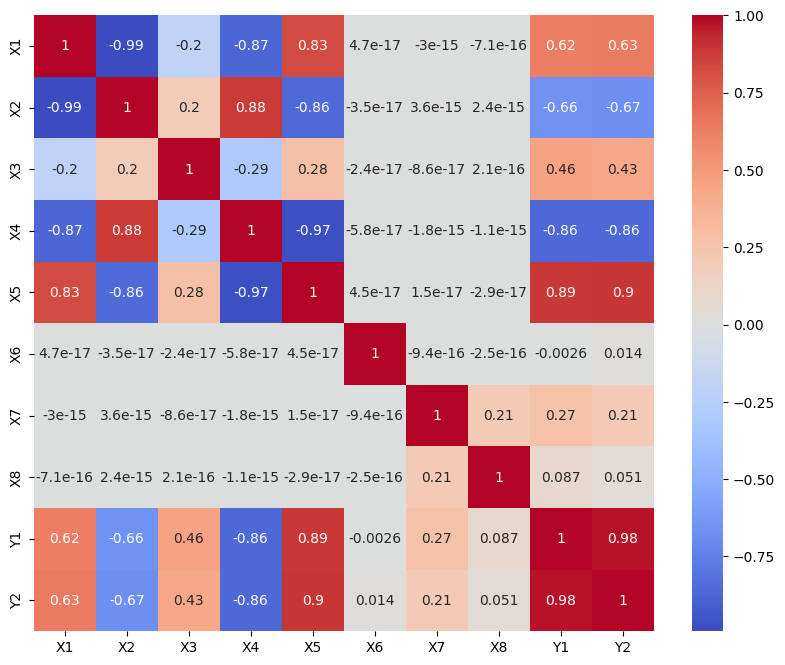

In [140]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

<Figure size 1000x800 with 0 Axes>

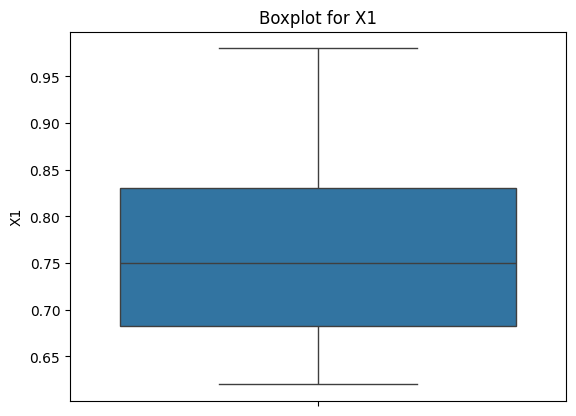

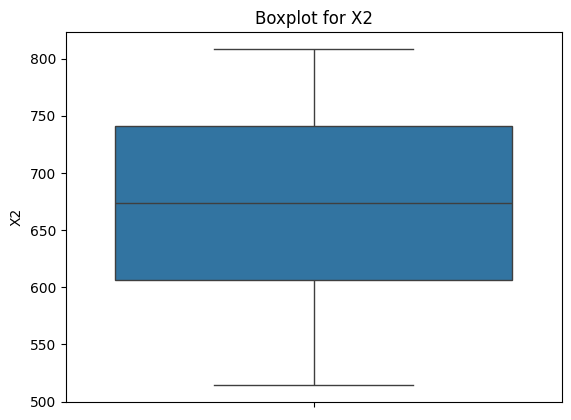

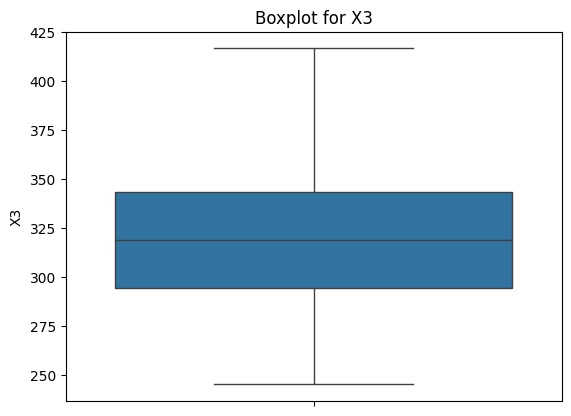

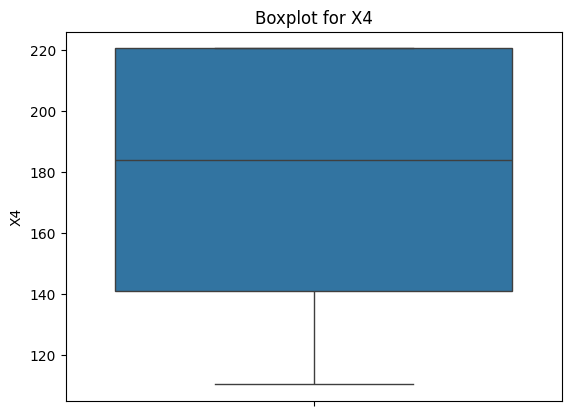

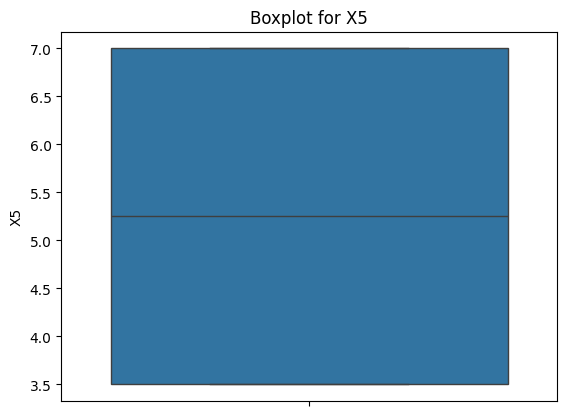

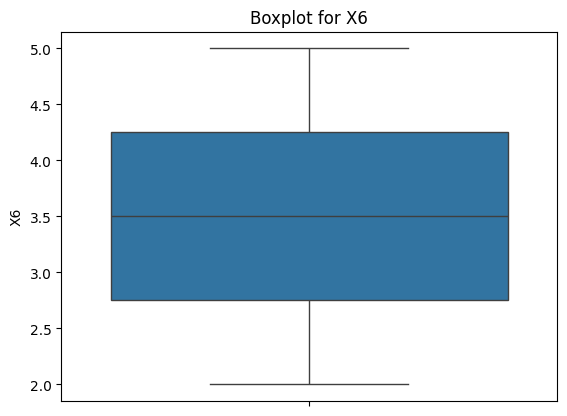

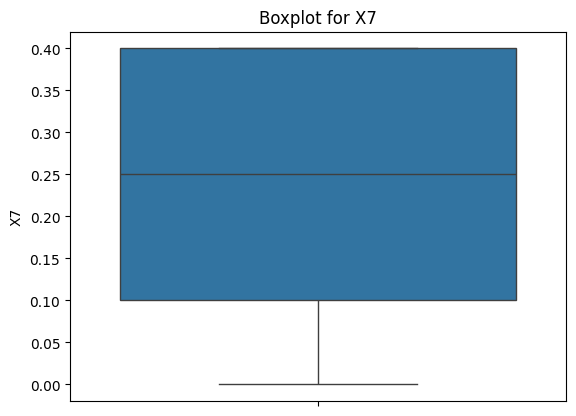

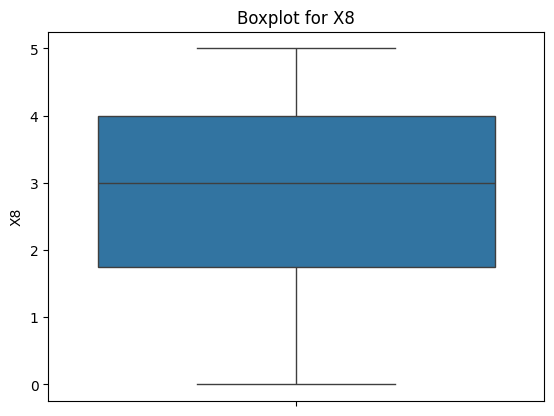

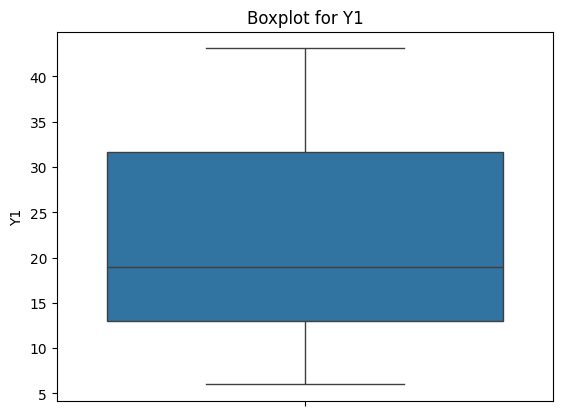

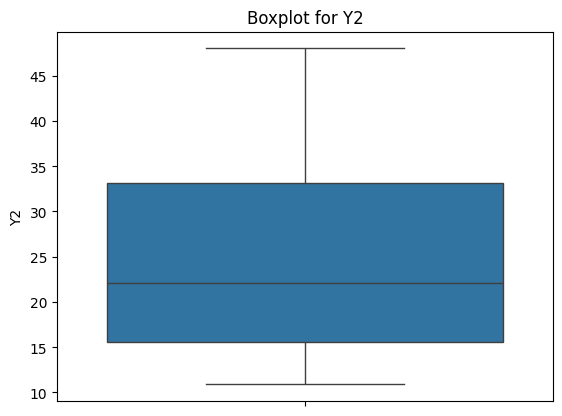

In [141]:
plt.figure(figsize=(10,8))
for column in df.columns:
    plt.figure()
    sns.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [142]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [143]:
def outlier_treatment(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR
    return ((df[feature]<lower_lim) | (df[feature]>upper_lim))
     

In [144]:
X_set = df.iloc[:,:-2]
X_set


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0


In [177]:
Y_set = df.iloc[:,-2:]
Y_set
Y = df.iloc[:, -2]
Y



0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

In [146]:
df_outlier = pd.DataFrame()
for feature in Y_set.columns:
    df_outlier[f'{feature}_outlier'] = outlier_treatment(df,feature)

In [147]:
df_outlier.sum()

Y1_outlier    0
Y2_outlier    0
dtype: int64

In [148]:

from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(
    X_set, Y, test_size=0.2, random_state=42
) 

In [149]:
X_mean = train_input.mean(axis=0)
X_std = train_input.std(axis=0)
train_input= (train_input - X_mean) / X_std
test_input = (test_input - X_mean) / X_std

y_mean = train_output.mean()
y_std = train_output.std()
train_output = (train_output - y_mean) / y_std
test_output = (test_output - y_mean) / y_std

In [150]:
train_input = np.hstack((np.ones((train_input.shape[0], 1)), train_input))  # Add bias column
test_input = np.hstack((np.ones((test_input.shape[0], 1)), test_input))

In [151]:
weights = np.random.rand(train_input.shape[1])

In [152]:

def compute_cost(X, Y, weights):
    m = len(Y)  
    predictions = np.dot(X, weights)  # h(X) = X * W
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost


In [153]:
from sklearn.metrics import mean_squared_error, r2_score
cost_history = []
def train_manual_model(train_input, train_output, learning_rate=0.01, iterations=1000):
    n_samples, n_features = train_input.shape
    weights = np.zeros(n_features)
    bias = 0
    for _ in range(iterations):
        # Predictions
        y_pred = np.dot(train_input, weights) + bias
        
        # Compute gradients
        error = y_pred - train_output
        weights_gradient = (2 / n_samples) * np.dot(train_input.T, error)
        bias_gradient = (2 / n_samples) * np.sum(error)
        
        # Update weights
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
        cost_h = compute_cost(train_input, train_output, weights) 
        cost_history.append(cost_h)
    
    return weights, bias

# Train the manual model
manual_weights, manual_bias = train_manual_model(train_input, train_output)

y_pred_manual = np.dot(test_input, manual_weights) + manual_bias

# Calculate metrics for the manual model
manual_r2 = r2_score(test_output, y_pred_manual)
manual_mse = mean_squared_error(test_output, y_pred_manual)
manual_rmse = np.sqrt(manual_mse)

print("Manual Model Performance:")
print(f"R² Score: {manual_r2}")
print(f"MSE: {manual_mse}")
print(f"RMSE: {manual_rmse}")


Manual Model Performance:
R² Score: 0.9034060463494354
MSE: 0.09959720783050324
RMSE: 0.31559025306638233


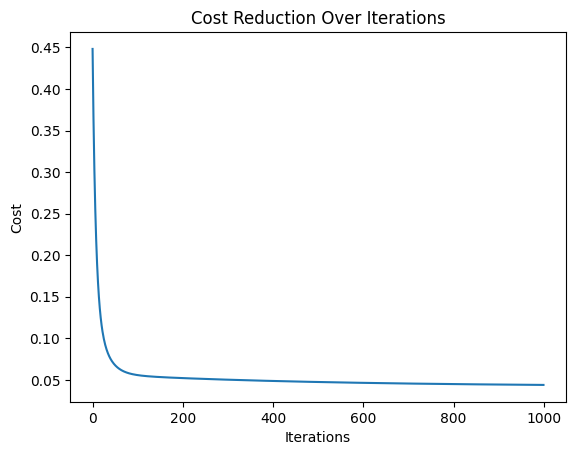

In [154]:
plt.plot(range(1000), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

### linear regression using sklearn only

In [155]:
from sklearn.linear_model import LinearRegression
# Normalize the training and testing input features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
test_input = scaler.transform(test_input)


In [156]:
linear_regressor = LinearRegression()

In [175]:
linear_regressor.fit(train_input, train_output)

LinearRegression()

In [176]:
linear_regressor.coef_

array([ 0.        , -0.64824145, -0.35851263,  0.07910455, -0.3896218 ,
        0.71765097, -0.00357398,  0.26854746,  0.0325578 ])

In [158]:
predicted_value = linear_regressor.predict(test_input)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(test_output, predicted_value)
r2_lr = r2_score(test_output, predicted_value)
rmse_lr = np.sqrt(mse_lr)


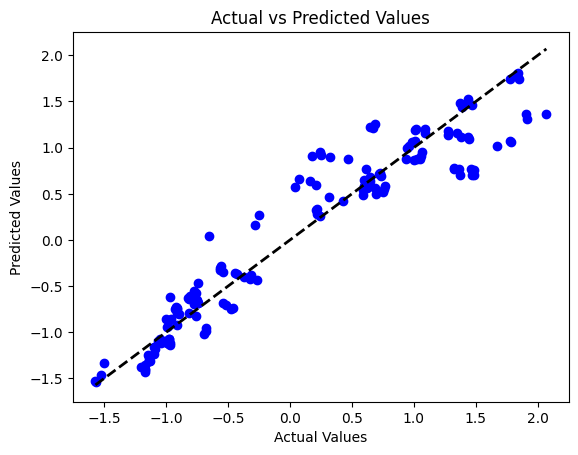

In [160]:

plt.scatter(test_output, predicted_value, color='blue')
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


### Ridge regression model using sklearn

In [161]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(train_input, train_output)

Ridge()

In [162]:
y_pred = ridge_model.predict(test_input)

# Calculate Mean Squared Error (MSE) and R² score
mse_rid = mean_squared_error(test_output, y_pred)
r2_rid = r2_score(test_output, y_pred)
rmse_rid = np.sqrt(mse_rid)

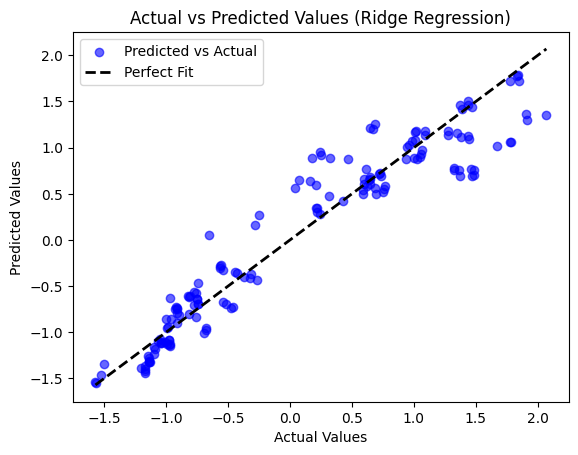

In [163]:
plt.scatter(test_output, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.legend()
plt.show()

### Lasso regression model using sklearn

In [164]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(train_input, train_output)

Lasso(alpha=0.1)

In [165]:
y_pred_las = lasso_model.predict(test_input)

mse_las = mean_squared_error(test_output, y_pred_las)
r2_las = r2_score(test_output, y_pred_las)
rmse_las = np.sqrt(mse_las)



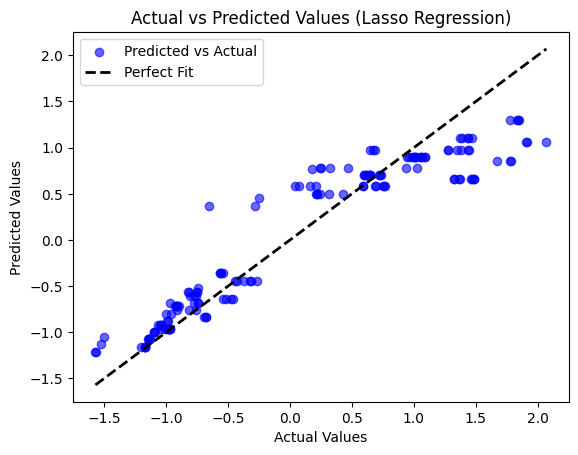

In [166]:
plt.scatter(test_output, y_pred_las, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.legend()
plt.show()

In [167]:
print("Manual Model Performance:")
print(f"R² Score: {manual_r2}")
print(f"MSE: {manual_mse}")
print(f"RMSE: {manual_rmse}")

Manual Model Performance:
R² Score: 0.9034060463494354
MSE: 0.09959720783050324
RMSE: 0.31559025306638233


In [168]:
print("Linear Regression Model:")
print(f"R² Score: {r2_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")

Linear Regression Model:
R² Score: 0.9121840951546909
MSE: 0.09054623602365434
RMSE: 0.300909016188705


In [169]:
print("Ridge Regression Model:")
print(f"R² Score: {r2_rid}")
print(f"MSE: {mse_rid}")
print(f"RMSE: {rmse_rid}")

Ridge Regression Model:
R² Score: 0.9116022996511598
MSE: 0.09114612044177915
RMSE: 0.30190415770866613


In [170]:
print("Lasso Regression Model:")
print(f"R² Score: {r2_las}")
print(f"MSE: {mse_las}")
print(f"RMSE: {rmse_las}")


Lasso Regression Model:
R² Score: 0.8805304826353249
MSE: 0.12318400790824163
RMSE: 0.35097579390641975


In [173]:
index_features = ['X1 : Relative Compactness', 'X2 : Surface Area','X3 : Wall Area','X4 : Roof Area','X5 : Overall Height','X6 : Orientation', 'X7 : Glazing Area', 'X8 : Glazing Area Distribution']

In [180]:
weighted_df = pd.DataFrame({'Features': index_features, 'Weighted Y1 : Heating Load': linear_regressor.coef_[1:]})

In [181]:
weighted_df = weighted_df.set_index('Features')
weighted_df

,Weighted Y1 : Heating Load
Features,
X1 : Relative Compactness,-0.648241
X2 : Surface Area,-0.358513
X3 : Wall Area,0.079105
X4 : Roof Area,-0.389622
X5 : Overall Height,0.717651
X6 : Orientation,-0.003574
X7 : Glazing Area,0.268547
X8 : Glazing Area Distribution,0.032558


## Significantly affecting heating load are:-

<p> 1. X2: Surface area </p>
<p> 2. X1: Relative Compactness</p>
<p> 3. X4: Roof Area </p>
<p> 4. X5: Overall Height </p>
<p> 5. X7: Glazing Area </p>

### Improvement Suggestions:-

<p> 1. Making building compact which will lead decrease in surface area &(roof area) and hence this will reduce heating load.</p>
<p> 2. Decreasing building height reduces heating load.</p>
<p> 3. Decreasing glazing(windows) area can reduce heat loss which are occuring through glass. </p> 